В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

In [76]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
import math
import random
%matplotlib inline

### Gamma распределение
ссылка на wiki: https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Плотность   вероятности   гамма   распределения  случайной величины  𝑋  имеет вид:

$$f(x) = x^{k-1} \frac{e^{-x/\theta}}{\theta ^{k}\Gamma(k)}$$

где  𝑥  > 0, а $\Gamma(k)$ - гамма-функция, которую будем считать из библиотеки math

Cлучайная величина ${\displaystyle X}$ имеет гамма-распределение с положительными параметрами ${\displaystyle \theta }$ - коэффициент масштаба и ${\displaystyle k}$ - число степеней свободы

Установим следующие параметры:

${\displaystyle \theta }$ = 2

${\displaystyle k}$ = 2

Математическое ожидание:
$E[X] = k \theta$

Дисперсия:
$D[X] = k \theta^2$

Стандартное отклонение:
$ \sigma = \sqrt{D[X]}$

Исходя из приведенных формул:

$E[X] = 4$

$D[X] = 8$

$\sigma = 2,8284$

In [77]:
sigma = math.sqrt(8)

Также рассмотрим еще один параметр гамма-распределения - это коэффициент вариации:
$$v = \frac{\sigma}{E[X]} = \frac{\sqrt{D[X]}}{E[X]}$$

In [78]:
# Соответствено теоретически:
v_teor = math.sqrt(8)/4
print(v_teor)

0.7071067811865476


In [79]:
# Напишем функцию для определения коэффициента вариации
def koef_var(ex, dx):
    return math.sqrt(dx)/ex

In [80]:
# Напишем функцию для определения ТЕОРИТИЧЕСКОЙ плотности gamma-распределения случайной величины, 
# с входными параметрами:
    # t (theta) - коэффициент масштаба (2)
    # k - число степеней свободы (2)
    # x - значение из диапазона "иксовых значений" (используем длину масива выборочных значений, то есть 1000 значений)
def eps_pdf(t, k, x):
    return ((x ** (k - 1)) * math.exp(-x / t) / t ** k * math.gamma(k))

In [81]:
# напишем функцию для определения теоритической плотности соответствующего (выборке) нормального распределения
def normal_pdf(x, mu, sigma):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)/(sqrt_two_pi * sigma)) 

In [82]:
# напишем функцию формирования выборки из 1000 случайных значений с входными параметрами:
    # value - количество случайных значений (у нас оно будет = 1000)
    # t (theta) - коэффициент масштаба (2)
    # k - число степеней свободы (2)
    # n - объем выборки (то есть количество раз выбора случайного числа)
def sample_expon(value, n, t = 2, k = 2, ex = 4):
    list_x = []
    for i in range(value):
        summa = np.sum(gamma.rvs(ex, size=n))
        list_x.append(summa/n)
    return list_x

In [83]:
# Создадим таблицу для хранения полученных данных и заполним первые значения
all_means = pd.DataFrame({
                        "Распределение :": ['Исходное'], 
                        "E[X]": [4], 
                        "D[X]": [8], 
                        "v": [round(v_teor, 4)],
                        "Std": [sigma]
                        })

### Теоретическая плотность гамма распределения

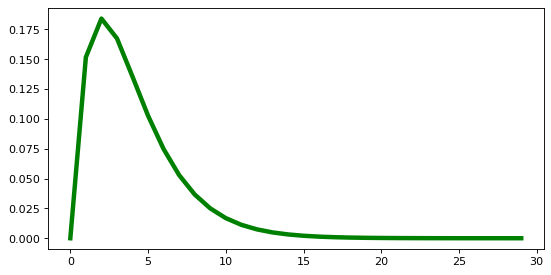

In [84]:
# зададим параметры распределения
t, k = 2, 2

# сформируем диапазон "иксовых" и "игрековых" значений
list_xt = range(30)
list_yt = [eps_pdf(t, k, x = i) for i in list_xt]

# сформируем график
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.plot(list_xt, list_yt, color='g', lw=4)
plt.show()

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

### Генерация выборки объемом 1000

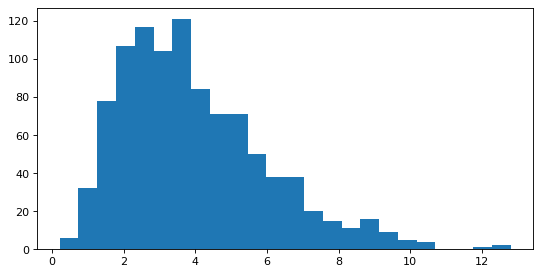

In [85]:
# зададим параметры выборки
value = 1000
n = 1

# сформируем выборку
list_x = sample_expon(value, n)
  
# формируем гистограмму выборки
fig, axes = plt.subplots(figsize=(8,4), dpi=80)

plt.hist(list_x,bins = 'auto')
plt.show()

### Сопоставим полученную выборку и теоретическую плотность распределения

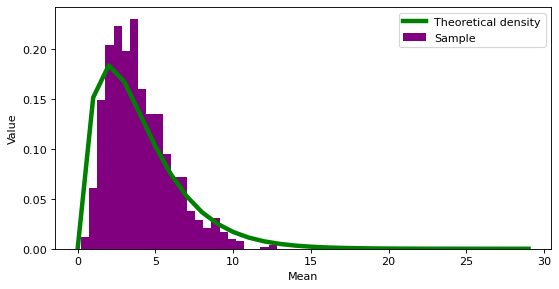

In [86]:
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', density = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')

plt.plot(list_xt, list_yt, label='Theoretical density', color='g', linestyle='-', lw=4)
plt.legend()
plt.show()

In [87]:
# Добавляем полученнные данные в общую таблицу значений:

new_line = {
                "Распределение :": 'Выборка 1', 
                "E[X]": np.round(np.mean(list_x),4), 
                "D[X]": np.round(np.var(list_x), 4), 
                "v": np.round(koef_var(np.mean(list_x),np.var(list_x)), 4),
                "Std": np.round(np.std(list_x), 4)
                }
all_means = all_means.append(new_line, ignore_index=True)
print(all_means);

  Распределение :    E[X]    D[X]       v       Std
0        Исходное  4.0000  8.0000  0.7071  2.828427
1       Выборка 1  3.9753  4.1604  0.5131  2.039700


Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

### Генерация 1000 выборок объемом 5

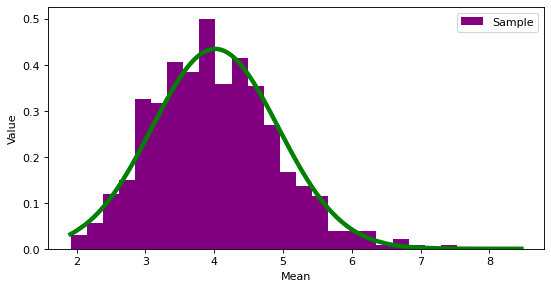

In [88]:
# зададим параметры выборки
value = 1000
n = 5

# сформируем выборку
list_x = sample_expon(value, n)
  
# формируем гистограмму выборки
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', density = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')
# формируем график плотности нормального распределения на выборочных значениях
plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)
plt.legend()
plt.show()

In [89]:
# Добавляем полученнные данные в общую таблицу значений:

new_line = {
                "Распределение :": 'Выборка об.5', 
                "E[X]": np.mean(list_x), 
                "D[X]": np.var(list_x), 
                "v": round(koef_var(np.mean(list_x),np.var(list_x)), 4),
                "Std": np.round(np.std(list_x), 4)
                }
all_means = all_means.append(new_line, ignore_index=True)
print(all_means)

  Распределение :      E[X]      D[X]       v       Std
0        Исходное  4.000000  8.000000  0.7071  2.828427
1       Выборка 1  3.975300  4.160400  0.5131  2.039700
2    Выборка об.5  4.014243  0.843758  0.2288  0.918600


### Генерация 1000 выборок объемом 10

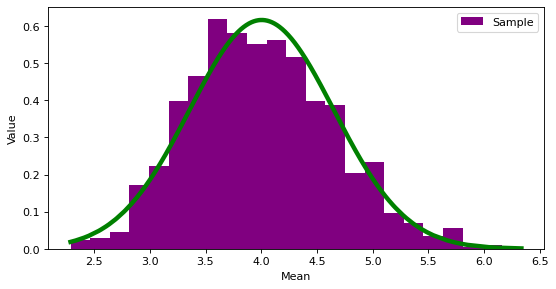

In [90]:
# зададим параметры выборки
value = 1000
n = 10

# сформируем выборку
list_x = sample_expon(value, n)
  
# формируем гистограмму выборки
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', density = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')
# формируем график плотности нормального распределения на выборочных значениях
plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)
plt.legend()
plt.show()

In [91]:
# Добавляем полученнные данные в общую таблицу значений:

new_line = {
                "Распределение :": 'Выборка об.10', 
                "E[X]": np.mean(list_x), 
                "D[X]": np.var(list_x), 
                "v": round(koef_var(np.mean(list_x),np.var(list_x)), 4),
                "Std": np.round(np.std(list_x), 4)
                }
all_means = all_means.append(new_line, ignore_index=True)
print(all_means)

  Распределение :      E[X]      D[X]       v       Std
0        Исходное  4.000000  8.000000  0.7071  2.828427
1       Выборка 1  3.975300  4.160400  0.5131  2.039700
2    Выборка об.5  4.014243  0.843758  0.2288  0.918600
3   Выборка об.10  4.003480  0.418998  0.1617  0.647300


### Генерация 1000 выборок объемом 50

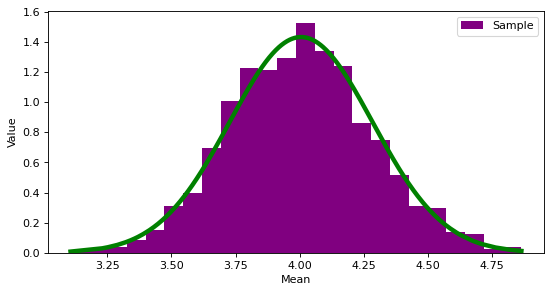

In [92]:
# зададим параметры выборки
value = 1000
n = 50

# сформируем выборку
list_x = sample_expon(value, n)
  
# формируем гистограмму выборки
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', density = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')
# формируем график плотности нормального распределения на выборочных значениях
plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)
plt.legend()
plt.show()

In [93]:
# Добавляем полученнные данные в общую таблицу значений:

new_line = {
                "Распределение :": 'Выборка об.50', 
                "E[X]": np.mean(list_x), 
                "D[X]": np.var(list_x), 
                "v": round(koef_var(np.mean(list_x),np.var(list_x)), 4),
                "Std": np.round(np.std(list_x), 4)
                }
all_means = all_means.append(new_line, ignore_index=True)
print(all_means)

  Распределение :      E[X]      D[X]       v       Std
0        Исходное  4.000000  8.000000  0.7071  2.828427
1       Выборка 1  3.975300  4.160400  0.5131  2.039700
2    Выборка об.5  4.014243  0.843758  0.2288  0.918600
3   Выборка об.10  4.003480  0.418998  0.1617  0.647300
4   Выборка об.50  4.005454  0.077489  0.0695  0.278400


### Генерация 1000 выборок объемом 150

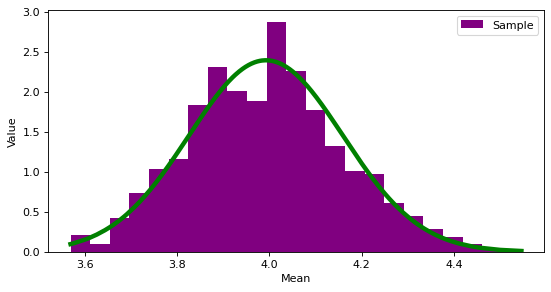

In [94]:
# зададим параметры выборки
value = 1000
n = 150

# сформируем выборку
list_x = sample_expon(value, n)
  
# формируем гистограмму выборки
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', density = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')
# формируем график плотности нормального распределения на выборочных значениях
plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)
plt.legend()
plt.show()

In [95]:
# Добавляем полученнные данные в общую таблицу значений:

new_line = {
                "Распределение :": 'Выборка об.100', 
                "E[X]": np.mean(list_x), 
                "D[X]": np.var(list_x), 
                "v": round(koef_var(np.mean(list_x),np.var(list_x)), 4),
                "Std": np.round(np.std(list_x), 4)
                }
all_means = all_means.append(new_line, ignore_index=True)
print(all_means)

  Распределение :      E[X]      D[X]       v       Std
0        Исходное  4.000000  8.000000  0.7071  2.828427
1       Выборка 1  3.975300  4.160400  0.5131  2.039700
2    Выборка об.5  4.014243  0.843758  0.2288  0.918600
3   Выборка об.10  4.003480  0.418998  0.1617  0.647300
4   Выборка об.50  4.005454  0.077489  0.0695  0.278400
5  Выборка об.100  3.992392  0.027829  0.0418  0.166800


Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

In [96]:
print(all_means)

  Распределение :      E[X]      D[X]       v       Std
0        Исходное  4.000000  8.000000  0.7071  2.828427
1       Выборка 1  3.975300  4.160400  0.5131  2.039700
2    Выборка об.5  4.014243  0.843758  0.2288  0.918600
3   Выборка об.10  4.003480  0.418998  0.1617  0.647300
4   Выборка об.50  4.005454  0.077489  0.0695  0.278400
5  Выборка об.100  3.992392  0.027829  0.0418  0.166800


Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

### Итого

Как мы увидели, выборочное среднее, с увеличением выборки приближается к математическому ожиданию нормального распределения (т.е. к 4-м в нашем случае), но при увеличении объема выборки более  𝑛>50  эффект от объема уже не такой сильный. И получаем подтверждение центральной предельной теоремы, что с увеличением количества независимых величин распределение становится похожим на нормельное.